**Import Necessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

**Define Custom Layer**

In [2]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

**Integrate Custom Layer into Model**

In [3]:
from tensorflow.keras.layers import Softmax

# Define the model with SoftMax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])

The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.


**Compile Model**

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.build((1000, 20))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_dense_layer (CustomDe (1000, 128)               2688      
_________________________________________________________________
custom_dense_layer_1 (Custom (1000, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (1000, 10)                0         
Total params: 3,978
Trainable params: 3,978
Non-trainable params: 0
_________________________________________________________________


**Train Model**

In [5]:
import numpy as np 

# Generate random data 
x_train = np.random.random((1000, 20)) 
y_train = np.random.randint(10, size=(1000, 1)) 

# Convert labels to categorical one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) 
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 [==============================] - 2s 3ms/step - loss: 2.3039
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2981
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 2.2959
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2951
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2940
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2920
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2905
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2864
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.2844
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 2.2839


**Evaluate Model**

In [6]:
# Generate random test data 
x_test = np.random.random((200, 20)) 
y_test = np.random.randint(10, size=(200, 1)) 

# Convert labels to categorical one-hot encoding 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10) 

# Evaluate the model 
loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

7/7 [==============================] - 0s 2ms/step - loss: 2.3133
Test loss: 2.313279628753662


**Visualize Model Architecture**

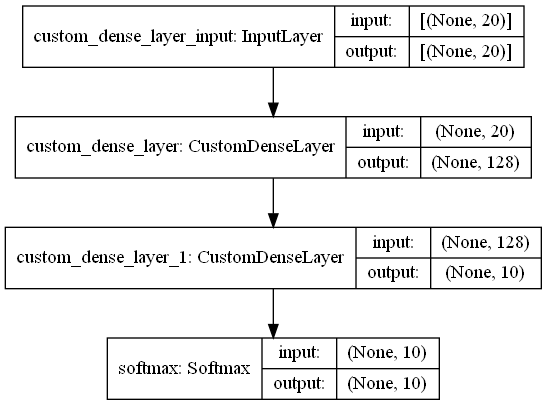

In [7]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

**Add Dropout Layer**

In [8]:
from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer
model = Sequential([
    CustomDenseLayer(64),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: nan
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: nan
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: nan
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: nan
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: nan


**Adjust the Number of Units in Custom Layer**

In [9]:
# Define a custom layer with 128 units
class CustomDenseLayer(Layer):
    def __init__(self, units=128):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

# Integrate the new custom layer into a model
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 7.5571
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 7.3410
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 7.3330
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 7.3273
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 7.3118
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 7.3050
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 7.2883
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 7.2960
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 7.2661
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 7.2610
